In [1]:
import cv2,os

#Este bloque de código genera un diccionario de python con índice como valores y nombres de las carpetas como claves.

ubidata='dataset'
grupos=os.listdir(ubidata)
identifier=[i for i in range(len(grupos))]

groupandID=dict(zip(grupos,identifier))

print(identifier)
print(grupos)
print(groupandID)

[0, 1]
['with mask', 'without mask']
{'with mask': 0, 'without mask': 1}


In [2]:
!pip install opencv-python

In [3]:
pwd


'C:\\Users\\vlady'

In [4]:
#Ahora crearemos dos listas vacías y agregaremos las imágenes y sus respectivos
#identificador en estas listas.
#PREPROCESSING
#Principal Component Analysis: PCA reduces data by geometrically projecting them onto lower dimensions 
#called principal components(PCs), CA is used in • exploratory data analysis • 
#for making predictive models • for dimensionality reduction

#Al cambiar el tamaño de estas imágenes y convertirla en escala de grises.
#usando OpenCV, para que todas nuestras imágenes sean del mismo tamaño y
#tener canales del mismo color.
data=[]
target=[]
tamañoimagen=100


for category in grupos:
    ubicarpetag=os.path.join(ubidata,category)
    listanomimagenes=os.listdir(ubicarpetag)
        
    for nombreimagen in listanomimagenes:
        ubiimagen=os.path.join(ubicarpetag,nombreimagen)
        imagen=cv2.imread(ubiimagen)

        try:
            #Aqui se convierte la imagen a escala de grises
            imgenbn=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)           
            #Aqui cambiamos el tamaño de la escala de grises a 100x100
            #necesitamos un tamaño común fijo para todas las imágenes en el conjunto de datos
            resized=cv2.resize(imgenbn,(tamañoimagen,tamañoimagen))
            data.append(resized)
            target.append(groupandID[category])
            #juntamos la imagen y la etiqueta (categorizada) en la lista (conjunto de datos)

        except Exception as e:
            print('Exception:',e)
            #si ocurre alguna excepción, la excepción se imprimirá aquí. Y pasa a la siguiente imagen.

In [5]:
!pip install scikit-learn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#El siguiente paso es normalizar el rango de color entre (0 a 255) a (0 a 1)
#al dividir los datos por 255.0. También remodelaremos estas imágenes en una matriz numpy
# de 4 dimensiones. En cuanto a las etiquetas, usaremos onehot encoding para convertirlos en 0 y 1. 
#np_utils.to_categorical es la función que usaremos realiza el onehot encoding
#esto crea nuevas columnas (binarias) que indican la presencia de cada valor posible a partir de los datos originales..
import numpy as np

target=np.array(target)
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],tamañoimagen,tamañoimagen,1))

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [8]:
#CONSTRUCCIÓN Y ENTRENAMIENTO DEL MODELO
# guardaremos las matrices data y target en un archivo numpy.
#Para que podamos usar estos datos y cargarlos en el futuro.

np.save('data',data)
np.save('target',new_target)

In [9]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#cargando las matrices guardadas

In [10]:
# Aqui creamos una Convolutional Neural Network usando keras.

from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Activation,Flatten,Dropout


modelo=Sequential()

modelo.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
#La primera capa de la CNN seguida de la activation y MaxPooling
#la capa activation decide si una neurona (nodo) debe activarse o no. 
#Decidirá si la entrada de la neurona a la red es importante o no en el proceso de predicción.
#Maxpooling2d Reduce la muestra de entrada (alto y ancho) tomando el valor máximo sobre una entrada definida por pool_size) 
#para cada canal de la entrada.

modelo.add(Conv2D(100,(3,3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
#La segunda capa de la cnn

modelo.add(Flatten())
modelo.add(Dropout(0.5))
#La función flatten aplana los tensores de entrada multidimensionales en una sola dimensión, 
#para poder modelar su capa de entrada y construir el modelo de red neuronal
modelo.add(Dense(50,activation='relu'))
#Dense layer de 64 neuronas, Recibe entrada de todas las neuronas en la capa anterior y produce la salida resultante como un vector
#Se utiliza con mayor frecuencia para la manipulación de vectores para cambiar las dimensiones de los vectores.
modelo.add(Dense(2,activation='softmax'))
#La capa final con dos salidas para dos categorías

modelo.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
#The next step is quite crucial , which is performing the train-test split.
#Train-test split is very necessary in Machine learning to get an idea
#of how good and accurate our model is on unseen data. A model gains all the 
#features during train and thus it becomes really important to check it’s
#performance on data it has not even seen yet. We’ll use sklearn to perform 
#train-test split.
#El próximo paso es bastante crucial, que es realizar el train-test split.
#es muy importante para tener una idea de qué tan bueno y preciso es nuestro modelo.
#Un modelo gana todos las características durante el entrenamiento por lo que lo dividiremos 90% training, 10% testing
#usaremos sklearn para realizar este split.
from sklearn.model_selection import train_test_split

xdata,ydata,xtarget,ytarget=train_test_split(data,target,test_size=0.1)

In [12]:
#Es hora de crear puntos de control para guardar el mejor modelo y luego entrenar a nuestro modelo.
checkpoint = ModelCheckpoint('modelo-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=modelo.fit(xdata,xtarget,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.7079 - accuracy: 0.6823

INFO:tensorflow:Assets written to: modelo-001.model\assets


INFO:tensorflow:Assets written to: modelo-001.model\assets


18/18 [==============================] - 28s 2s/step - loss: 0.7079 - accuracy: 0.6823 - val_loss: 0.6781 - val_accuracy: 0.6331
Epoch 2/20
18/18 [==============================] - ETA: 0s - loss: 0.6128 - accuracy: 0.6841

INFO:tensorflow:Assets written to: modelo-002.model\assets


INFO:tensorflow:Assets written to: modelo-002.model\assets


18/18 [==============================] - 23s 1s/step - loss: 0.6128 - accuracy: 0.6841 - val_loss: 0.6253 - val_accuracy: 0.6475
Epoch 3/20
18/18 [==============================] - ETA: 0s - loss: 0.5272 - accuracy: 0.7744

INFO:tensorflow:Assets written to: modelo-003.model\assets


INFO:tensorflow:Assets written to: modelo-003.model\assets


18/18 [==============================] - 22s 1s/step - loss: 0.5272 - accuracy: 0.7744 - val_loss: 0.5405 - val_accuracy: 0.7266
Epoch 4/20
18/18 [==============================] - ETA: 0s - loss: 0.4037 - accuracy: 0.8610

INFO:tensorflow:Assets written to: modelo-004.model\assets


INFO:tensorflow:Assets written to: modelo-004.model\assets


18/18 [==============================] - 23s 1s/step - loss: 0.4037 - accuracy: 0.8610 - val_loss: 0.3771 - val_accuracy: 0.8633
Epoch 5/20
18/18 [==============================] - ETA: 0s - loss: 0.3016 - accuracy: 0.8953

INFO:tensorflow:Assets written to: modelo-005.model\assets


INFO:tensorflow:Assets written to: modelo-005.model\assets


18/18 [==============================] - 21s 1s/step - loss: 0.3016 - accuracy: 0.8953 - val_loss: 0.3372 - val_accuracy: 0.8705
Epoch 6/20
18/18 [==============================] - ETA: 0s - loss: 0.2549 - accuracy: 0.9061

INFO:tensorflow:Assets written to: modelo-006.model\assets


INFO:tensorflow:Assets written to: modelo-006.model\assets


18/18 [==============================] - 22s 1s/step - loss: 0.2549 - accuracy: 0.9061 - val_loss: 0.3035 - val_accuracy: 0.8705
Epoch 7/20
18/18 [==============================] - 18s 1s/step - loss: 0.2399 - accuracy: 0.9061 - val_loss: 0.3086 - val_accuracy: 0.8633
Epoch 8/20
18/18 [==============================] - ETA: 0s - loss: 0.1868 - accuracy: 0.9350

INFO:tensorflow:Assets written to: modelo-008.model\assets


INFO:tensorflow:Assets written to: modelo-008.model\assets


18/18 [==============================] - 23s 1s/step - loss: 0.1868 - accuracy: 0.9350 - val_loss: 0.2783 - val_accuracy: 0.8849
Epoch 9/20
18/18 [==============================] - 20s 1s/step - loss: 0.1446 - accuracy: 0.9531 - val_loss: 0.3039 - val_accuracy: 0.8705
Epoch 10/20
18/18 [==============================] - ETA: 0s - loss: 0.1479 - accuracy: 0.9513

INFO:tensorflow:Assets written to: modelo-010.model\assets


INFO:tensorflow:Assets written to: modelo-010.model\assets


18/18 [==============================] - 22s 1s/step - loss: 0.1479 - accuracy: 0.9513 - val_loss: 0.2346 - val_accuracy: 0.9065
Epoch 11/20
18/18 [==============================] - 20s 1s/step - loss: 0.1186 - accuracy: 0.9567 - val_loss: 0.3070 - val_accuracy: 0.8849
Epoch 12/20
18/18 [==============================] - 18s 999ms/step - loss: 0.1220 - accuracy: 0.9585 - val_loss: 0.2686 - val_accuracy: 0.8849
Epoch 13/20
18/18 [==============================] - 17s 937ms/step - loss: 0.1127 - accuracy: 0.9729 - val_loss: 0.2744 - val_accuracy: 0.8921
Epoch 14/20
18/18 [==============================] - 18s 978ms/step - loss: 0.1120 - accuracy: 0.9657 - val_loss: 0.2678 - val_accuracy: 0.8777
Epoch 15/20
18/18 [==============================] - 17s 946ms/step - loss: 0.1737 - accuracy: 0.9386 - val_loss: 0.2799 - val_accuracy: 0.8489
Epoch 16/20
18/18 [==============================] - 18s 1s/step - loss: 0.1106 - accuracy: 0.9621 - val_loss: 0.2507 - val_accuracy: 0.8993
Epoch 17/20
1

In [13]:
!pip install matplotlib

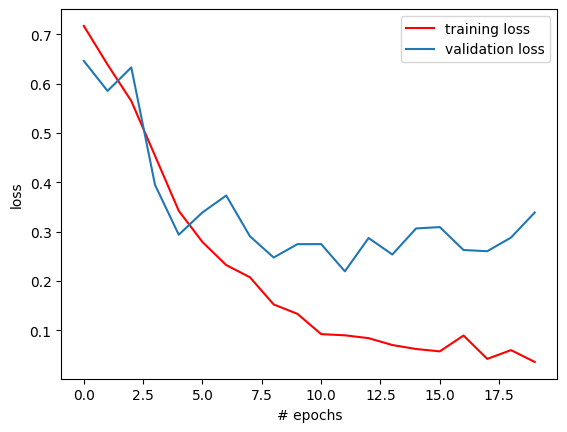

In [14]:

#Hcemos las graficas
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

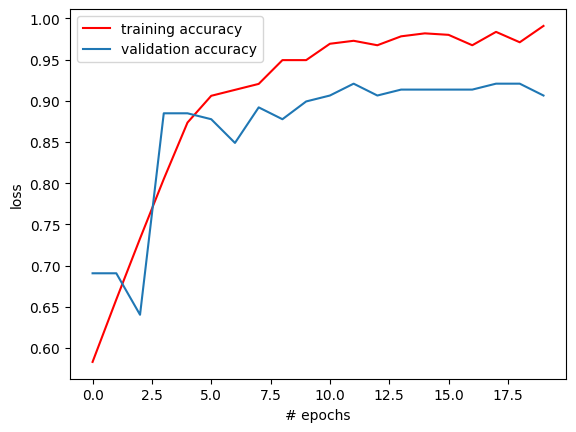

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
print(modelo.evaluate(ydata,ytarget))

3/3 [==============================] - 0s 115ms/step - loss: 0.6061 - accuracy: 0.8571
[0.606054961681366, 0.8571428656578064]


In [18]:
from keras.models import load_model
import cv2
import numpy as np

In [19]:
#A partir de aca se carga el modelo y se usa cascadeclassifier para capturar rostros usando la webcam
modelo = load_model('modelo-012.model')

detectacara=cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

fuente=cv2.VideoCapture(0)

IDs={0:'with_mask',1:'without_mask'}
Rojooverde={0:(0,255,0),1:(0,0,255)}

In [20]:
while(True):

    ret,imagen=fuente.read()
    imgenbn=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    rostros=detectacara.detectMultiScale(imgenbn,1.3,5)  

    for x,y,w,h in rostros:
    
        imagenrostro=imgenbn[y:y+w,x:x+w]
        resized=cv2.resize(imagenrostro,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        resultado=modelo.predict(reshaped)

        label=np.argmax(resultado,axis=1)[0]
      
        cv2.rectangle(imagen,(x,y),(x+w,y+h),Rojooverde[label],2)
        cv2.rectangle(imagen,(x,y-40),(x+w,y),Rojooverde[label],-1)
        cv2.putText(imagen, IDs[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('WEBCAM PLAZA COMERCIAL',imagen)
    ya=cv2.waitKey(1)
    
    if(ya==27):
        break
        
cv2.destroyAllWindows()
fuente.release()

1/1 [==============================] - 0s 45ms/step


KeyboardInterrupt: 